<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Обзор-данных,-предобработка-и-исследовательский-анализ" data-toc-modified-id="Обзор-данных,-предобработка-и-исследовательский-анализ-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Обзор данных, предобработка и исследовательский анализ</a></span></li></ul></div>

# Test project

## Обзор данных, предобработка и исследовательский анализ

In [212]:
# Импортируем библиотеки
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import plotly.express as px 
from plotly import graph_objects as go
pd.set_option('display.max_rows', None)



In [213]:
# Загружаем датасет, проверяем
try:
    data=pd.read_csv('https://docs.google.com/spreadsheets/d/1JyOifokU4fM70nFwit9LGS5eGr8ZJPdcaSOwFBofKi4/edit?gid=1568243872#gid=1568243872')
except:
    data=pd.read_csv('/Users/elena/Desktop/Копия Аналитик — тестовое задание - data.csv')
    
data.head()
                     

,event_id,event_date,customer_id,is_attend,group_ids,teacher_ids,attendance_id
0,5,2020-05-22,47,1,2,6,12
1,15,2020-06-03,354,1,5,4,57
2,34,2020-06-17,183,1,5,4,158
3,22,2020-06-11,12,1,1,3,95
4,36,2020-06-19,260,1,5,4,185


In [214]:
# Знакомимся с датасетом
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   event_id       320 non-null    int64 
 1   event_date     320 non-null    object
 2   customer_id    320 non-null    int64 
 3   is_attend      320 non-null    int64 
 4   group_ids      320 non-null    int64 
 5   teacher_ids    320 non-null    int64 
 6   attendance_id  320 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 17.6+ KB


Из описания данных нам известно значение каждого столбца. Скопирую:
event_id	идентификатор урока
event_date	дата урока
customer_id	идентификатор ученика
is_attend	1 — посетил, 0 — пропустил
group_ids	идентификатор группы
teacher_ids	идентификатор преподавателя
attendance_id	идентификатор строки

Пропусков в столбцах у нас нет. Значит, далее смотрим отдельно каждый столбец - знакомимся с данными поближе. Основные вопросы - есть ли повторяющиеся значения, в датах - диапазон. 

Построим гистограммы для быстрого ознакомления со значениями в столбцах.

array([[<AxesSubplot:title={'center':'event_id'}>,
        <AxesSubplot:title={'center':'customer_id'}>],
       [<AxesSubplot:title={'center':'is_attend'}>,
        <AxesSubplot:title={'center':'group_ids'}>],
       [<AxesSubplot:title={'center':'teacher_ids'}>,
        <AxesSubplot:title={'center':'attendance_id'}>]], dtype=object)

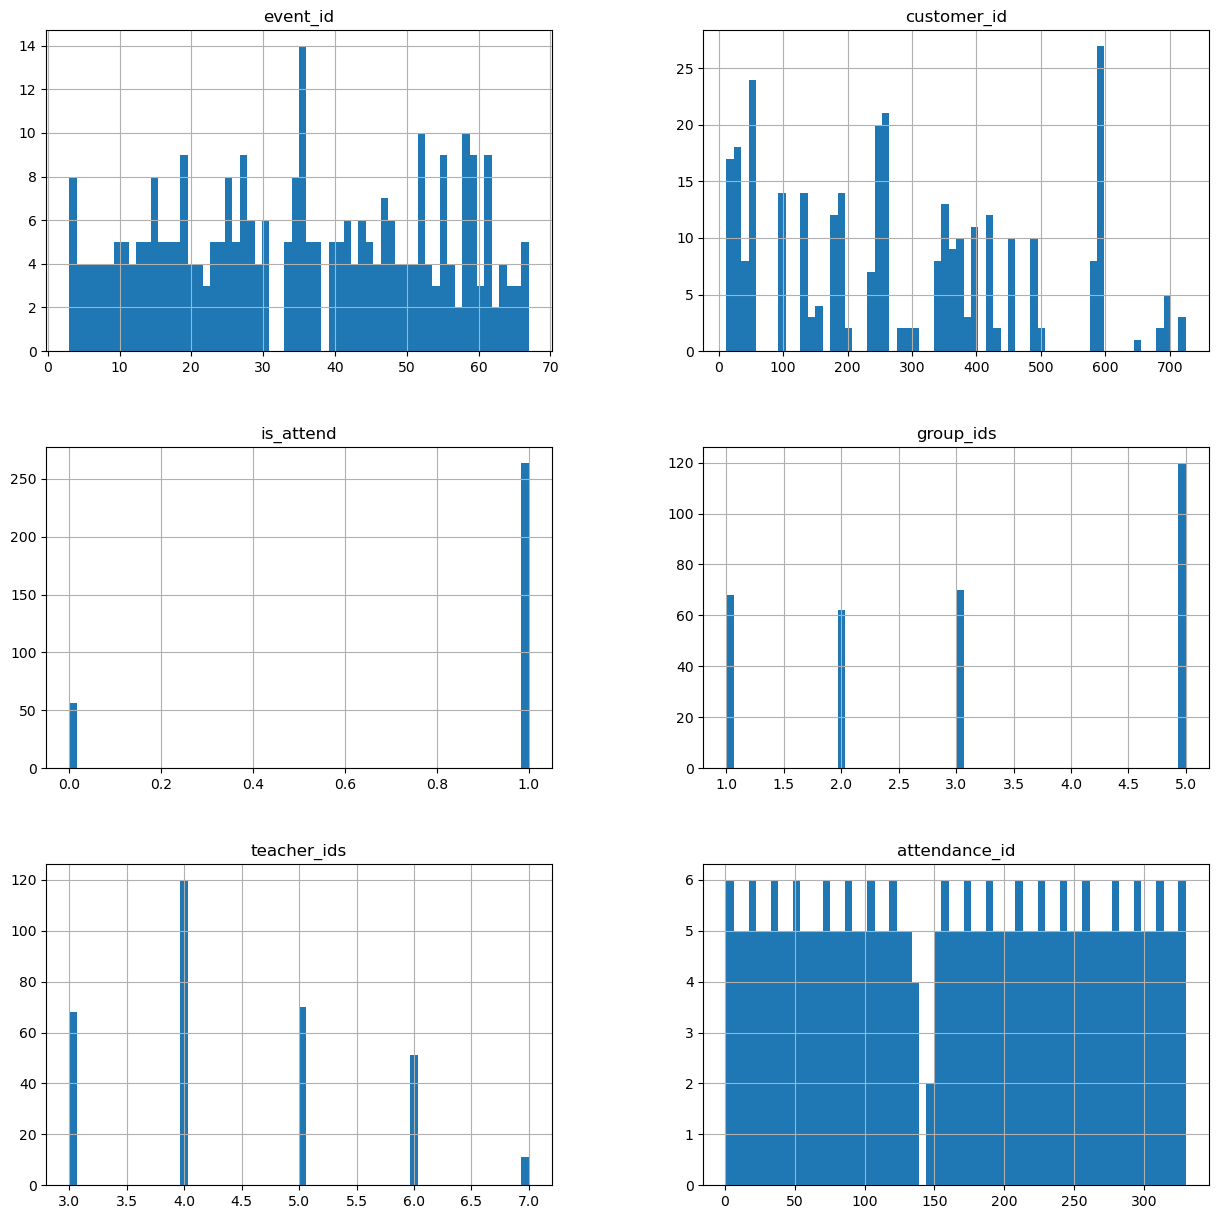

In [215]:
data.hist(bins=62,figsize=(15, 15))

Есть несколько интересных пропусков, заглянем в них: в столбце event_id нет некоторых значений, в столбце groups_id сомнительная нумерация без 4 группы, не хватает идентификаторов строк в районе 150 - можно предположить утрату данных где-то посередине периода. 

In [216]:
print(data['event_date'].value_counts())
print(data['event_date'].min())

print(data['event_date'].max())
print(data['event_date'].nunique())


event_date
2020-06-17    19
2020-07-01    14
2020-06-12    14
2020-06-05    14
2020-06-10    13
2020-07-15    13
2020-07-03    13
2020-06-19    13
2020-06-26    12
2020-07-10    12
2020-06-24    11
2020-06-25    10
2020-06-04    10
2020-07-08     9
2020-05-21     8
2020-06-11     8
2020-06-30     8
2020-06-03     8
2020-07-02     7
2020-07-07     6
2020-07-09     6
2020-06-16     6
2020-06-18     6
2020-06-27     6
2020-06-20     5
2020-05-29     5
2020-06-01     5
2020-06-23     5
2020-07-14     5
2020-05-27     5
2020-06-02     5
2020-06-09     4
2020-05-25     4
2020-06-13     4
2020-05-30     4
2020-06-06     4
2020-05-23     4
2020-05-28     4
2020-05-26     4
2020-05-22     4
2020-07-16     3
Name: count, dtype: int64
2020-05-21
2020-07-16
41


Записи велись за почти два месяца, в некоторые даты было много уроков или скорее были групповые уроки.

In [217]:
print(data['event_id'].value_counts())
data['event_id'].nunique()

event_id
52    10
58    10
61     9
59     9
27     9
19     9
55     9
25     8
36     8
15     8
34     8
47     7
30     6
48     6
42     6
44     6
35     6
28     6
18     5
10     5
11     5
38     5
37     5
41     5
24     5
33     5
13     5
16     5
17     5
14     5
23     5
40     5
26     5
45     5
6      4
51     4
4      4
12     4
9      4
63     4
5      4
29     4
56     4
3      4
8      4
43     4
20     4
50     4
53     4
49     4
46     4
7      4
21     4
64     3
67     3
60     3
54     3
22     3
65     3
57     2
62     2
66     2
Name: count, dtype: int64


62

Групповые занятия действительно преобладают. На уроках присутствовало до 10 учеников, хотя обычно сильно меньше. При детальном анализе стоит посмотреть как высокая явка соотносится со стартом группы, а низкая - с продолжением обучения.

In [218]:
print(data['customer_id'].value_counts())
data['customer_id'].nunique()


customer_id
52     16
26     15
260    15
12     14
192    14
354    13
247    13
183    12
419    12
99     12
137    12
401    11
452    10
493    10
379    10
360     9
593     9
234     7
249     7
590     7
258     6
49      6
335     6
587     5
700     5
37      4
152     4
580     4
14      3
30      3
383     3
725     3
145     3
595     3
597     3
42      2
94      2
279     2
681     2
496     2
47      2
435     2
36      2
586     2
135     2
295     2
345     2
308     2
197     2
578     2
654     1
Name: count, dtype: int64


51

Покупатели посещали уроки до 16 раз, их 51 человек. Многие посетили всего несколько занятий - вероятно, большинство из них бросили. Остальные возможно только начали занятия.

In [219]:
print('Группа 1:',data.query('group_ids==1')['teacher_ids'].value_counts())
print('Группа 2:',data.query('group_ids==2')['teacher_ids'].value_counts())
print('Группа 3:',data.query('group_ids==3')['teacher_ids'].value_counts())
print('Группа 5:',data.query('group_ids==5')['teacher_ids'].value_counts())


Группа 1: teacher_ids
3    68
Name: count, dtype: int64
Группа 2: teacher_ids
6    46
7    11
5     5
Name: count, dtype: int64
Группа 3: teacher_ids
5    65
6     5
Name: count, dtype: int64
Группа 5: teacher_ids
4    120
Name: count, dtype: int64


Только две группы - id 1 и id 5 велись постоянными учителями, остальные были с заменами.

In [220]:
# Идентификаторы строк должны быть уникальными
data['attendance_id'].nunique()


320

Пока же займемся отсутствующими

In [221]:
print(data['is_attend'].value_counts())

is_attend
1    264
0     56
Name: count, dtype: int64


In [222]:
absents=data.query('is_attend==0')
print('Распределение отсутствующих по группам',absents['group_ids'].value_counts())
print('Распределение отсутствующих по учителям',absents['teacher_ids'].value_counts())
print('Распределение отсутствующих по урокам', absents['event_id'].value_counts())

Распределение отсутствующих по группам group_ids
5    20
1    18
3     9
2     9
Name: count, dtype: int64
Распределение отсутствующих по учителям teacher_ids
4    20
3    18
5     9
6     6
7     3
Name: count, dtype: int64
Распределение отсутствующих по урокам event_id
35    4
61    3
37    3
27    3
44    3
38    3
47    2
59    2
48    2
11    2
55    2
10    2
57    1
66    1
25    1
9     1
13    1
18    1
40    1
28    1
46    1
60    1
50    1
43    1
29    1
33    1
51    1
15    1
58    1
24    1
17    1
30    1
7     1
67    1
52    1
49    1
16    1
Name: count, dtype: int64


Тут никакого 'криминала' нет. Количество отсутствующих соразмерно количеству групп, не привязано к какому-то одному учителю и количество отсутствующих на уроке - максимум 4 человека за раз. Посмотрим что это за уроки такие были с 3-4 отсутствующими:

In [223]:
df_absent=data.query('event_id in [35,61, 37, 27, 44, 38]')

df_absent.pivot_table(index=['event_id','event_date','group_ids', 'teacher_ids','is_attend'], values='customer_id', aggfunc='count')

customer_id
event_id event_date group_ids teacher_ids is_attend             
27       2020-06-12 5         4           0                    3
                                          1                    6
35       2020-06-17 1         3           0                    4
                                          1                    2
37       2020-06-19 2         6           0                    3
                                          1                    2
38       2020-06-20 1         3           0                    3
                                          1                    2
44       2020-06-25 1         3           0                    3
                                          1                    3
61       2020-07-10 5         4           0                    3
                                          1                    6

В основном, 5 и 1 группы, учителя id 3 и 4.

Пропусков - пятая часть записей. Но уроков с низкой явкой сильно больше.  В дальнейшем надо будет проверить, не исчезают ли ученики посередине обучения - если они бросают официально, то их пропуски уже не будут в системе. Для этого посмотрим когда стартовали группы, 'дожили' ли они до конца периода в датасете. Нагляднее это будет видно на графиках.

Группируем данные по дате, группам и учителям. Агрегирующей функцией посчитаем количество записанных учеников и фактически присутствующих. По сгруппированным данным отбираем отдельные группы и строим по ним графики.

In [224]:
# Группируем данные
grouped_df = data.groupby(['event_date', 'group_ids', 'teacher_ids']).agg(count=('customer_id','count'), sum=('is_attend', 'sum')).reset_index()

grouped_df

,event_date,group_ids,teacher_ids,count,sum
0,2020-05-21,1,3,4,4
1,2020-05-21,3,5,4,4
2,2020-05-22,2,6,4,4
3,2020-05-23,1,3,4,4
4,2020-05-25,3,5,4,3
5,2020-05-26,2,6,4,4
6,2020-05-27,5,4,5,3
7,2020-05-28,1,3,4,3
8,2020-05-29,5,4,5,3
9,2020-05-30,1,3,4,4


Помним, что временные рамки датасета - с 21 мая по 16 июля.

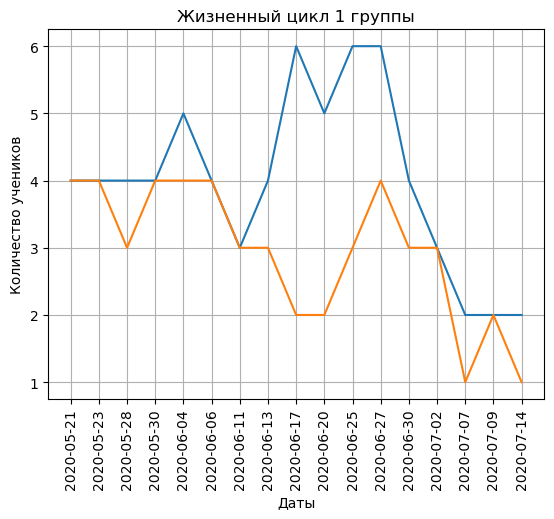

In [225]:
df_1 = grouped_df.query('group_ids==1')
y = df_1['count']
x = df_1['event_date']
y2 = df_1['sum']
x2 = df_1['event_date']
lines = plt.plot(x, y, x2, y2)
plt.xticks(rotation=90)
plt.title('Жизненный цикл 1 группы')
plt.xlabel('Даты')
plt.ylabel('Количество учеников')
plt.grid()
plt.show()

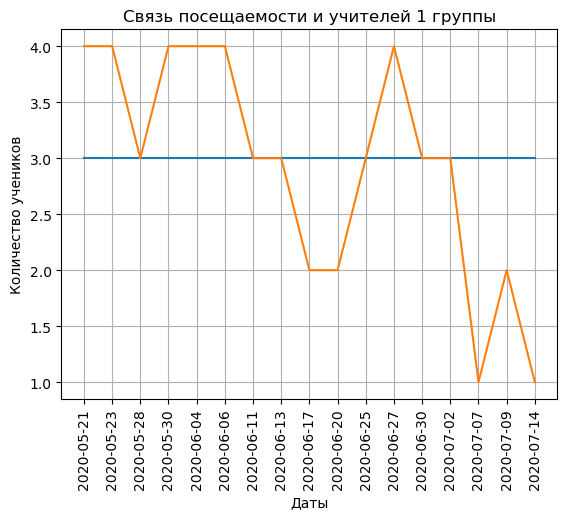

In [226]:
y = df_1['teacher_ids']
x = df_1['event_date']
y2 = df_1['sum']
x2 = df_1['event_date']
lines = plt.plot(x, y, x2, y2)
plt.xticks(rotation=90)
plt.title('Связь посещаемости и учителей 1 группы')
plt.xlabel('Даты')
plt.ylabel('Количество учеников')
plt.grid()
plt.show()

Начнем с 1 группы. На первом графике две линии - верхняя обозначает количество записанных учеников вообще, нижняя - количество присутствовавших на уроке.  Было 17 занятий. Группа стартовала 21 мая с 4 человек и на момент последнего урока в ней числилось двое, присутствовал один. Наиболее крепко она выглядела в начале периода, когда занятия стабильно посещали 3-4 человека. Потом записалось много народу - и не пришли. К концу все выглядит печально, группа превратилась в индивидуальные занятия, официально отписалось 4 человека. Что-то не задалось у новичков. 

На втором графике мы видим историю посещений и id учителя (это синяя линия)  - можно посмотреть, не связана ли посещаемость со сменой учителя. В данном случае учитель один, с id 3

Аналогично посмотрим историю остальных групп.

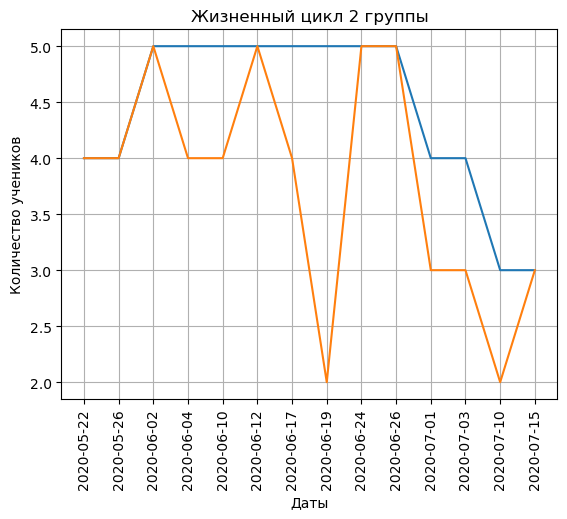

In [227]:
df_2 = grouped_df.query('group_ids==2')
y = df_2['count']
x = df_2['event_date']
y2 = df_2['sum']
x2 = df_2['event_date']
lines = plt.plot(x, y, x2, y2)
plt.xticks(rotation=90)
plt.title('Жизненный цикл 2 группы')
plt.xlabel('Даты')
plt.ylabel('Количество учеников')
plt.grid()
plt.show()

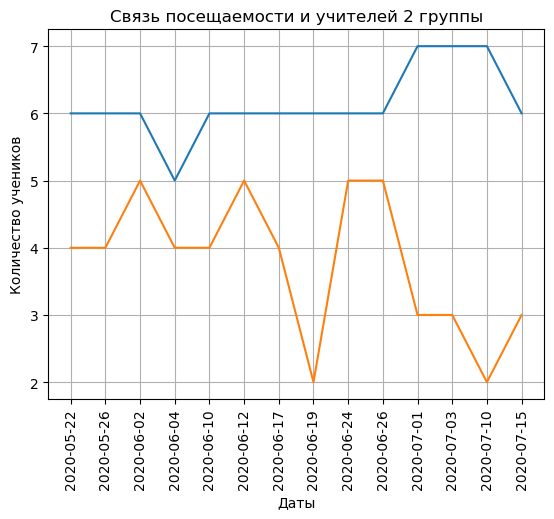

In [228]:
y = df_2['teacher_ids']
x = df_2['event_date']
y2 = df_2['sum']
x2 = df_2['event_date']
lines = plt.plot(x, y, x2, y2)
plt.xticks(rotation=90)
plt.title('Связь посещаемости и учителей 2 группы')
plt.xlabel('Даты')
plt.ylabel('Количество учеников')
plt.grid()
plt.show()

Вторая группа тоже начала рано и дожила до дедлайна. Она выглядит крепко - есть постоянный костяк группы, который ходит регулярно (4-5 человек), есть 2 провала - 19 июня и 10 июля, когда пришло всего двое. К концу наблюдений от занятий отписались два человека. Тенденция нехорошая и длительная смена учителя на пользу не идет явно, группа рассыпается.

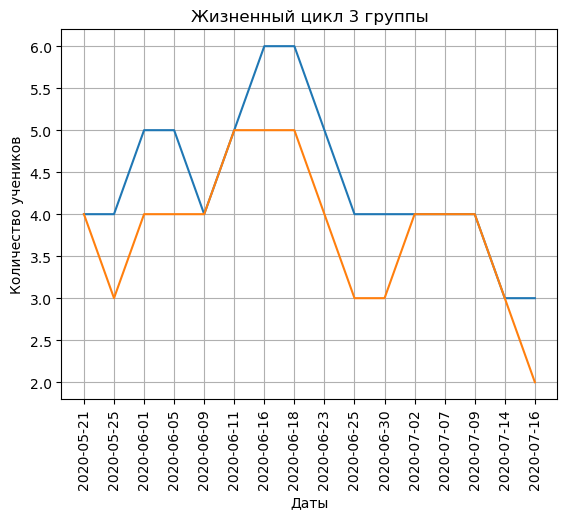

In [229]:
df_3 = grouped_df.query('group_ids==3')
y = df_3['count']
x = df_3['event_date']
y2 = df_3['sum']
x2 = df_3['event_date']
lines = plt.plot(x, y, x2, y2)
plt.xticks(rotation=90)
plt.title('Жизненный цикл 3 группы')
plt.xlabel('Даты')
plt.ylabel('Количество учеников')
plt.grid()
plt.show()

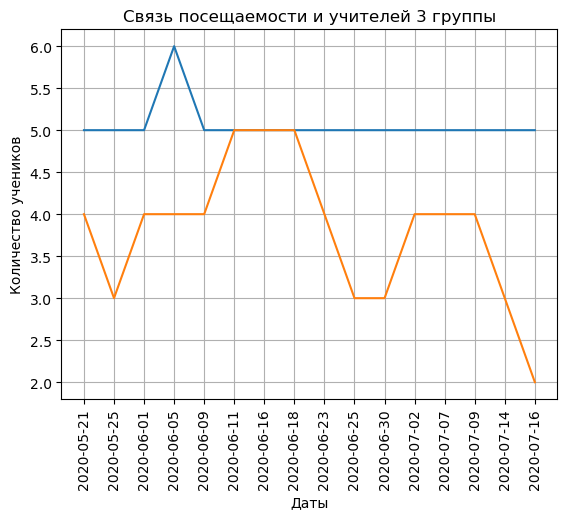

In [230]:
y = df_3['teacher_ids']
x = df_3['event_date']
y2 = df_3['sum']
x2 = df_3['event_date']
lines = plt.plot(x, y, x2, y2)
plt.xticks(rotation=90)
plt.title('Связь посещаемости и учителей 3 группы')
plt.xlabel('Даты')
plt.ylabel('Количество учеников')
plt.grid()
plt.show()

Группа 3 тоже начала почти с начала наблюдений, первоначально тоже состояла из 4 человек, потом записались еще двое. По посещениям видно, что кто-то посетил всего несколько занятий - линия посещений стабильно отстает на одного человека, слияния линий редки. В конце группа тоже начинает деградировать. Учитель у группы почти весь период один и тот же - id 5. Только один раз они поменялись с id6 группами 4-5 июня - видимо, личные обстоятельства.

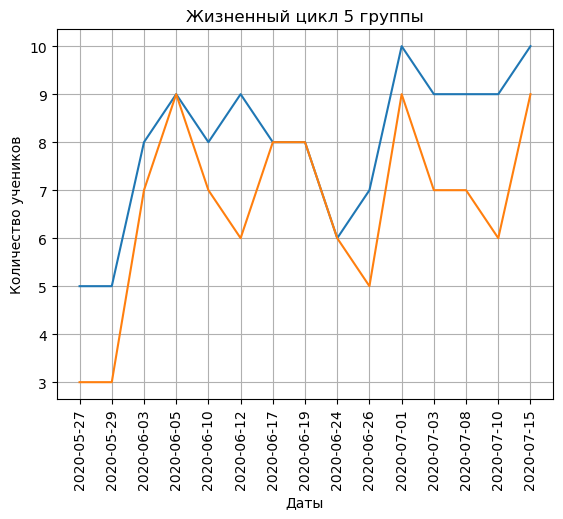

In [231]:
df_5 = grouped_df.query('group_ids==5')
y = df_5['count']
x = df_5['event_date']
y2 = df_5['sum']
x2 = df_5['event_date']
lines = plt.plot(x, y, x2, y2)
plt.xticks(rotation=90)
plt.title('Жизненный цикл 5 группы')
plt.xlabel('Даты')
plt.ylabel('Количество учеников')
plt.grid()
plt.show()

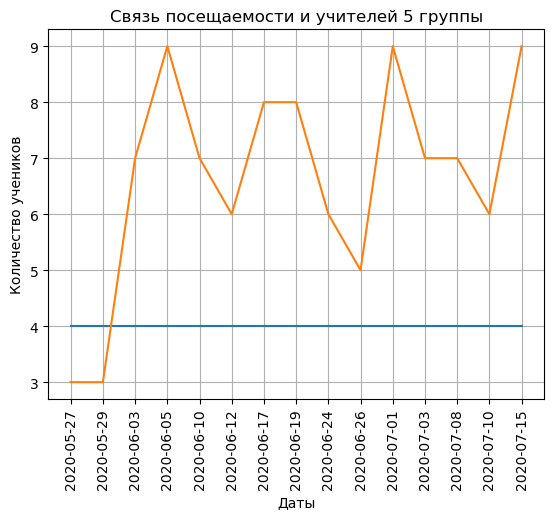

In [232]:

y = df_5['teacher_ids']
x = df_5['event_date']
y2 = df_5['sum']
x2 = df_5['event_date']
lines = plt.plot(x, y, x2, y2)
plt.xticks(rotation=90)
plt.title('Связь посещаемости и учителей 5 группы')
plt.xlabel('Даты')
plt.ylabel('Количество учеников')
plt.grid()
plt.show()

Пятая группа стартовала позже - возможно, срботало сарафанное радио или просто реклама дала плоды и решили сделать еще группу - в нее сразу записалось пятеро, но присутствовали вначале трое. Эта группа самая многочисленная и процветающая. У нее был кризис в середине периода, но пришли новые люди, причем быстро - и группа получила второе дыхание. Правда больше людей - больше прогульщиков: 2-3 человека почти на каждом занятии. Учитель id4 стабилен, тут все тоже хорошо.